# COGS 118A- Final Project: Fake News Detection

- Joshua Howon Kim
- Yewon Hong
- Seonghun Oh

# Abstract 

As social media has become used from almost every person in the world, it has been easier for people to receive and share news. However, this easy access of news has also allowed it to be much easier to spread fake news. There are many platforms that purposely spread fake and biased news for their own benefit. It is very difficult for individuals to tell whether news is fake or real. Thus, this intentional spread of fake news is able to bring up many social conflicts, leading to disasters in the society. Therefore, it is very important for people to be able to correctly identify if the news they are reading is real or fake. The goal of our project is to solve this problem by using machine learning classifiers and correctly detecting if a news is real or fake. The data we are using is scraped from snopes.com which is a website that fact checks and analyzes information from the news. The variables in the dataset include: the title, comments by the public on the fact, claims to support the comment, label of the news (True, False, Miscaptioned), summary of the content, information that are true, false and unknown. We will be using these data to understand how each variable affects on the validity of the news content. In order to validate if the news is fake or not, we will be using multivariable logistic regression and SVM.   

# Background
As SNS spreads rapidly, fake news disguised as the media remains a major social problem. Fake news has become a particular public issue for the following reason:As online public opinion spheres are activated, people have diverse and easy access to platforms such as YouTube, and SNS. Unverified issues are produced and spread easily in that they can be freely spoken and shared information and opinions, making it easy for anyone to make news that may be extreme or wrongful, and spread them. Since 2017, academic research and discussion have gotten in earnest in the United States, where fake news remarked by Trump had been shifted to fake news.<a name="holannote"></a>[<sup>1</sup>](#holan)According to previous discussions of fake news, fake news has been broadly defined as A) for political and economic gain, B) deliberately distorting and fabricating, and C) false information disguised as media coverage.<a name="westnote"></a>[<sup>2</sup>](#west)With the introduction of artificial intelligence and various technology to distinguish fake news and unidentified information by SNS, media companies, also with the emergence of several fact-checking media show that media literacy has become a must for modern people.<a name="arxivnote"></a>[<sup>3</sup>](#arxiv) Machine Learning(ML) algorithm can be the solution. At first, the use of ML algorithm can detect fake news easily and automatically. In addition, the dataset can easily be collected to train calssifiers, especially supervised calssifiers. Since these classifiers depend on labelled datasets, by training these classifiers, we can identify fake news more accurately than from a human perspective.

# Problem Statement

Fake news damages certain people's reputation, violates someone’s privacy and personality rights and causes false prejudices against specific groups. Furthermore, it reduces the credibility of established media and other opinions and causes distortions in the process of forming political opinions. This causes social confusion and division, which harms civil society and its members and society as a whole. This is because it can cover facts and truths and spread false or distorted information to hinder the formation of sound public opinion. Naturally, such crackdowns and regulations on fake news are necessary. However, the biggest problem with fake news that we faced is that the current concept of fake news can be widespread and ambiguous. This is why the priority should be to find out what fake news is if legislation is to save damage to fake news. In a world of millions of news, they rely on manual human detection, so their scope is so limited that if the fake news is posted and deleted every minute, they cannot be manually responsible or executed. It can be a solution through the development of a system that provides reliable, automated exponential scores, namely trained machine learning.  solution through the development of a system that provides reliable, automated exponential scores, namely trained machine learning.

In [1]:
#Erase later

# Detail how/where you obtained the data and cleaned it (if necessary)

# If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

# Please give the following infomration for each dataset you are using
# - link/reference to obtain it
# - description of the size of the dataset (# of variables, # of observations)
# - what an observation consists of
# - what some critical variables are, how they are represented
# - any special handling, transformations, cleaning, etc you have done should be demonstrated here!

## Dataset1: 
The data source used for this project is LIAR dataset which contains 3 files with .tsv format for test, train and validation. Below is some description about the data files used for this project.

##### LIAR: A BENCHMARK DATASET FOR FAKE NEWS DETECTION

William Yang Wang, "Liar, Liar Pants on Fire": A New Benchmark Dataset for Fake News Detection, to appear in Proceedings of the 55th Annual Meeting of the Association for Computational Linguistics (ACL 2017), short paper, Vancouver, BC, Canada, July 30-August 4, ACL.

original dataset contained 13 variables/columns for train, test and validation sets as follows:

`Column 1`: the ID of the statement ([ID].json)

`Column 2`: the label (Label class contains: True, Mostly-true, Half-true, Barely-true, FALSE, Pants-fire)

`Column 3`: the statement

`Column 4`: the subject(s)

`Column 5`: the speaker

`Column 6`: the speaker's job title

`Column 7`: the state info

`Column 8`: the party affiliation

 : For `Column 3`, we used countervectorize for statement, and `Column 4 to 8`, they are all discrete variables, so we didn’t consider to train this variables


`Column 9-13`: the total credit history count, including the current statement.

`Column 9`: barely true counts

`Column 10`: false counts

`Column 11`: half true counts

`Column 12`: mostly true counts

`Column 13`: pants on fire counts

`Column 14`: the context (venue / location of the speech or statement)

To make things simple we have chosen only 2 variables from this original dataset for this classification. The other variables can be added later to add some more complexity and enhance the features.

Below are the columns used to create 3 datasets that have been in used in this project

`Column 1`: Statement (News headline or text)

`Column 2`: Label (Label class contains: True, False)

newly created dataset has only 2 classes as compared to 6 from original classes. Below is method used for reducing the number of classes.

* Original -- 	New

* True -- 		True

* Mostly-true --  True

* Half-true -- 	 True

* Barely-true --   False

* False --		False

* Pants-fire --	False



## DATASET 2:

##### FAKE NEWS NET Dataset

* politifact_fake.csv - Samples related to fake news collected from PolitiFact

* politifact_real.csv - Samples related to real news collected from PolitiFact

* gossipcop_fake.csv - Samples related to fake news collected from GossipCop

* gossipcop_real.csv - Samples related to real news collected from GossipCop




Each of the above CSV files is comma separated file and have the following columns


`id` - Unique identifider for each news

`url` - Url of the article from web that published that news

`title` - Title of the news article

`tweet_ids` - Tweet ids of tweets sharing news. This field is list of tweetids separated by tab.





LIAR dataset and the politifact and gossipcop datasets all contain information related to news and its veracity. They can be combined to create a larger dataset that can be used for training models to detect fake news. Use one dataset to validate the other: two datasets contain different types of information, they can be used to validate each other: LIAR dataset can be used to validate the performance of models trained on the politifact and gossipcop datasets, and vice versa. We can use one dataset for feature engineering:The politifact and gossipcop datasets can be used to extract features related to the sources of news articles, which can be used to train models on the LIAR dataset. Also, this shows using ensemble methods: Ensemble methods combine the predictions of multiple models to improve accuracy. By training models on both datasets and using ensemble methods, the overall performance of the model can be improved. In summary, combining datasets, using one dataset for feature engineering, and using ensemble methods can all be effective ways to use our two datasets. The most effective approach will depend on the specific research question and the nature of the data.


In [2]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb

In [3]:
test_filename = './liar_dataset/test.tsv'
train_filename = './liar_dataset/train.tsv'
valid_filename = './liar_dataset/valid.tsv'

In [4]:
column_name = ['ID.json','label','statement','subject','speaker',"speaker's job title",'state','party affiliation','barely true counts','false counts','half true counts','mostly true counts','pants on fore counts','the context']
train_data_origin = pd.read_csv(train_filename, sep="\t")
test_data_origin = pd.read_csv(test_filename, sep="\t")
valid_data_origin = pd.read_csv(valid_filename, sep="\t")

train_data = train_data_origin.values.tolist()
test_data = test_data_origin.values.tolist()
valid_data = valid_data_origin.values.tolist()

train_data = pd.DataFrame(train_data, columns=column_name)
test_data = pd.DataFrame(test_data, columns=column_name)
valid_data = pd.DataFrame(valid_data, columns=column_name)

In [5]:
train_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,true,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


In [6]:
test_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,11685.json,false,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
1,11096.json,false,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
2,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
3,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video
4,5962.json,true,Over the past five years the federal governmen...,"federal-budget,pensions,retirement",brendan-doherty,NaN,Rhode Island,republican,1,2,1,1,0,a campaign website


In [7]:
valid_data.head()

,ID.json,label,statement,subject,speaker,speaker's job title,state,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fore counts,the context
0,238.json,pants-fire,"When Obama was sworn into office, he DID NOT u...","obama-birth-certificate,religion",chain-email,NaN,NaN,none,11,43,8,5,105,NaN
1,7891.json,false,Says Having organizations parading as being so...,"campaign-finance,congress,taxes",earl-blumenauer,U.S. representative,Oregon,democrat,0,1,1,1,0,a U.S. Ways and Means hearing
2,8169.json,half-true,Says nearly half of Oregons children are poor.,poverty,jim-francesconi,Member of the State Board of Higher Education,Oregon,none,0,1,1,1,0,an opinion article
3,929.json,half-true,On attacks by Republicans that various program...,"economy,stimulus",barack-obama,President,Illinois,democrat,70,71,160,163,9,interview with CBS News
4,9416.json,false,Says when armed civilians stop mass shootings ...,guns,jim-rubens,Small business owner,New Hampshire,republican,1,1,0,1,0,"in an interview at gun shop in Hudson, N.H."


In [8]:
# extract label and statement
train_news = train_data.iloc[:,1:3]
test_news = test_data.iloc[:,1:3]
valid_news = test_data.iloc[:,1:3]

In [9]:
train_news.head()

,label,statement
0,half-true,When did the decline of coal start? It started...
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo..."
2,false,Health care reform legislation is likely to ma...
3,half-true,The economic turnaround started at the end of ...
4,true,The Chicago Bears have had more starting quart...


In [10]:
#check the unique value of label
print(train_news['label'].value_counts())

half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64


In [11]:
# replace original label to binary label
train_news = train_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})
test_news = test_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})
valid_news = valid_news.replace({'label' : { 'half-true' : 1, 'false' : 0, 'mostly-true' : 1 , 'true' : 1, 'barely-true' : 1, 'pants-fire' : 0}})

In [12]:
train_news.head()

,label,statement
0,1,When did the decline of coal start? It started...
1,1,"Hillary Clinton agrees with John McCain ""by vo..."
2,0,Health care reform legislation is likely to ma...
3,1,The economic turnaround started at the end of ...
4,1,The Chicago Bears have had more starting quart...


In [13]:
print(train_news['label'].value_counts())

1    7406
0    2833
Name: label, dtype: int64


In [14]:
politifact_fake = pd.read_csv('./FakeNewsNet/politifact_fake.csv')
politifact_fake['label'] = 'fake'
politifact_real = pd.read_csv('./FakeNewsNet/politifact_real.csv')
politifact_real['label'] = 'real'
gossipcop_fake = pd.read_csv('./FakeNewsNet/gossipcop_fake.csv')
gossipcop_fake['label'] = 'fake'
gossipcop_real = pd.read_csv('./FakeNewsNet/gossipcop_real.csv')
gossipcop_real['label'] = 'real'

In [15]:
fake_news = pd.concat([politifact_fake, gossipcop_fake])
real_news = pd.concat([politifact_real, gossipcop_real])

In [16]:
def create_distribution(dataFile):
    return sb.countplot(x='label', data=dataFile, palette='hls')

<AxesSubplot:xlabel='label', ylabel='count'>

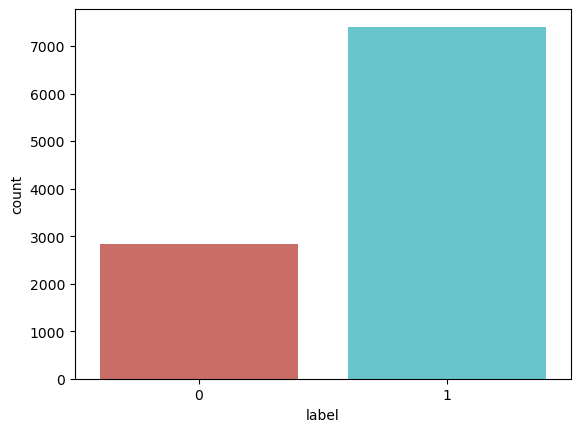

In [17]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

In [18]:
# check missing label
def data_qualityCheck():
    print('train data')
    print(train_news.isnull().sum())
    train_news.info()
    print('\n')
        
    print('test data')
    print(test_news.isnull().sum())
    test_news.info()
    print('\n')

    print('valid data')
    print(valid_news.isnull().sum())
    valid_news.info()

In [19]:
data_qualityCheck()

train data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10239 non-null  int64 
 1   statement  10239 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.1+ KB


test data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 non-null   int64 
 1   statement  1266 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


valid data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 n

In [20]:
train_news.dropna().shape

(10239, 2)

In [21]:
test_news.dropna().shape

(1266, 2)

# Evaluation Metrics

The evaluation metrics we will be using will be True positive rate (recall) and Accuracy. For recall, we will be using (correctly evaluating that news is false) / (correctly evaluating that news is false + evaluating that news is true when it is actually false). This recall rate is important for our problem because it tells us the rate of us being able to correctly evaluate that the news is false. For Accuracy, we will be using (correctly evaluating that news is false + evaluating that news is false when it is actually true) / (correctly evaluating that news is false + correctly evaluating that news is true + evaluating that news is true when it is actually false + evaluating that news is false when it is actually true). Accuracy is important for our problem because it tells us if our model was able to accurately make correct predictions in evaluating that the news is false. We will then plot an ROC curve to show the performance of the classification model and then find the AUC to provide an aggregate measure of performance across all possible classification thresholds.

# Proposed Solution

##### Benchmark model: 
BERT (Bidirectional Encoder Representations from Transformers), FakeNewsNet: https://arxiv.org/pdf/1809.01286.pdf

##### Solution: multivariable logistic regression

##### Library used: numpy, pandas, scikit-learn

Since our problem is a multiclass classification of evaluating if the news is True, Mostly-true, Half-true, Barely-true, FALSE, Pants-fire (6 labels), we will be using multi-class logistic regression. In order to process the test into input data, we will be using vectorization. Then we will be adding this vectorized input to variables from multiple columns and evaluate whether the news is true or false. Thus, we will be using multivariable logistic regression. First of all, we will be dividing the dataset into training/validation set and test set. Next, because vectorizing the text into word units creates too many variables, we will be using normalization. Because we will be needing strong normalization, we believe that using L1 normalization will be effective. The search plane itself is a vectorized text, therefore it is possible for it to become very high dimension which may result in being stuck in the local minima. In order to prevent this problem, we will be using momentum in our training. Also, in order to quickly do weight updates in training, we will be using mini-batch. In the validation step, we will be using K-fold cross validation to retreive the most accurate model. 

##### Text Processing
After converting articles into token lists through CountVectorizer, TfidTransformer, and TfidVectorizer, vectorize them based on the count and frequency of appearance of tokens. In addition, TfidVectorier creates a BOW encoding vector that weights words in a TF-IDF, enabling document preprocessing. Using the TF-IDF method, you can manually adjust the parameter C to use an estimate that is a LogisticRegressionCV. Specifying cv=5, using kfold cross-validation for hyperparameter tuning. The criterion for model measurement is the accuracy of classification, and by setting it to n_jobs=-1, all CPU cores are dedicated. We’ll evaluate the performance by maximizing the number of iterations of the optimization algorithm.

##### Modeling
As a classification model, machine learning algorithms can be used 
a) Logistic Registration, b) SVM, c) Random Forest, and boosted trees(AdaBoost)

First, modeling using the logistic regression algorithm.
For modeling, separate train, validation sets and test set.
Using the same dataset and the same text method and train_test_split, we can create logistic regression models that classify news as real or fake news. After organizing and preprocessing text data, performing feature extraction, and building and distributing a logistic regression classifier using the scikit-learn, evaluate the accuracy of the model.
Second, Using SVM(Support Vector Machines) to build classification prediction models and compare prediction accuracy on datasets for verification.
Third, tree-based random forest. Using Adaboost to fit the shallow decision tree on the train set, and additional classifiers can be placed on the same data to correct errors and can be weighted. 
Also, k-fold cross-validation, which is known to be useful because the amount of data is not enough to experiment with a larger amount of data on a smaller dataset to increase the statistical reliability of methodological performance measurements.

##### Evaluation
Confusion matrix : f1_score, report / Precision, recall 


##### What we see moving forward and limitations
Using RNN, CNN, and LSTM, which are algorithms of deep learning could have analyzed with better performance. However, we need to review whether there are enough samples for deep learning, and we can later create a model using appropriate algorithms by devising how to classify new articles that we have never seen before. 

In [22]:
#Feature select

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec

In [24]:
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['statement'].values)

In [25]:
print(train_count.shape)
# (# of statement, # of word(all word in every statement) in statement)

(10239, 12195)


In [26]:
print(countV.get_feature_names_out()[1000:1010])
# print(countV.vocabulary_)

['amniocentesis' 'among' 'amongst' 'amount' 'amounted' 'amounting'
 'amounts' 'ample' 'amputee' 'amtrak']


In [27]:
! pip install import_ipynb
! pip install sklearn_evaluation

importing Jupyter notebook from Feature.ipynb
half-true      2114
false          1994
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64
1    7406
0    2833
Name: label, dtype: int64
train data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10239 entries, 0 to 10238
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      10239 non-null  int64 
 1   statement  10239 non-null  object
dtypes: int64(1), object(1)
memory usage: 160.1+ KB


test data
label        0
statement    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266 entries, 0 to 1265
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      1266 non-null   int64 
 1   statement  1266 non-null   object
dtypes: int64(1), object(1)
memory usage: 19.9+ KB


valid data
label      

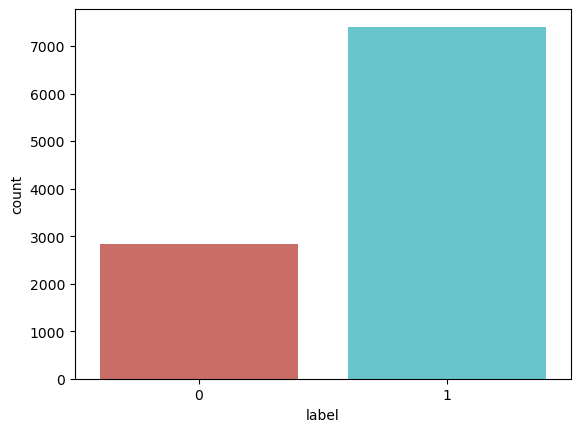

In [28]:
import import_ipynb
import Feature
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import sklearn_evaluation
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report

In [29]:
## ^^이거 위에 마지막에 내가 지울게 다돌리고 

In [30]:
# define train, test, validation set
X_train = Feature.train_news['statement']
y_train = Feature.train_news['label']

X_test = Feature.test_news['statement']
y_test = Feature.test_news['label']

X_val = Feature.valid_news['statement']
y_val = Feature.valid_news['label']

# define whole dataset
X = pd.concat([X_train, X_test, X_val])
y = pd.concat([y_train, y_test, y_val])

In [31]:
# define classification function using model
def classification(clf, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # using 5 fold cross validation
    train_size,train_score,test_score = learning_curve(clf, X_train, y_train, cv=5)
    sklearn_evaluation.plot.learning_curve(train_score, test_score, train_size)
    
    acc = np.mean(y_test == y_pred)
    clf_table = classification_report(y_test, y_pred, target_names=['false', 'true'])
    
    return acc, clf_table

In [32]:
#Using bag of word (CounterVectorize)
# vanila logistic regression
model_lgr_vanila = Pipeline([
        ('feature_extractor',Feature.countV),
        ('clf',LogisticRegression())
        ])

# set l2 penalty and C = 0.01 (need to regularize)
model_lgr = Pipeline([
        ('feature_extractor',Feature.countV),
        ('lgr_clf',LogisticRegression(penalty='l2', C=0.01))
        ])

# vanila Linear SVM
model_svm_vanila = Pipeline([
        ('feature_extractor',Feature.countV),
        ('svm_clf',svm.LinearSVC())
        ])

# vanila Linear SVM
model_svm = Pipeline([
        ('feature_extractor',Feature.countV),
        ('svm_clf',svm.LinearSVC(loss = 'hinge', C = 0.1))
        ])

# vanila Linear SVM
model_svm = Pipeline([
        ('feature_extractor',Feature.countV),
        ('svm_clf',svm.LinearSVC(loss = 'hinge', C = 0.1))
        ])

Optimize model hyperparameters: Random Forest Classifier has several hyperparameters that can be tuned to improve the model's performance.

In [33]:
# random forest
model_rf = Pipeline([
        ('feature_extractor',Feature.countV),
        ('rf_clf',RandomForestClassifier(n_estimators=1000,n_jobs=3))
        ])

Evaluation Metrics: While accuracy is a commonly used metric for classification tasks, it may not always be the best indicator of model performance, especially in cases where the class distribution is imbalanced. We considered using additional metrics such as precision, recall, F1-score, and ROC-AUC score to evaluate the performance of the model.

/Users/yewonhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yewonhong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

accuracy :  0.7131224553711243
              precision    recall  f1-score   support

       false       0.46      0.28      0.35       871
        true       0.76      0.87      0.82      2322

    accuracy                           0.71      3193
   macro avg       0.61      0.58      0.58      3193
weighted avg       0.68      0.71      0.69      3193



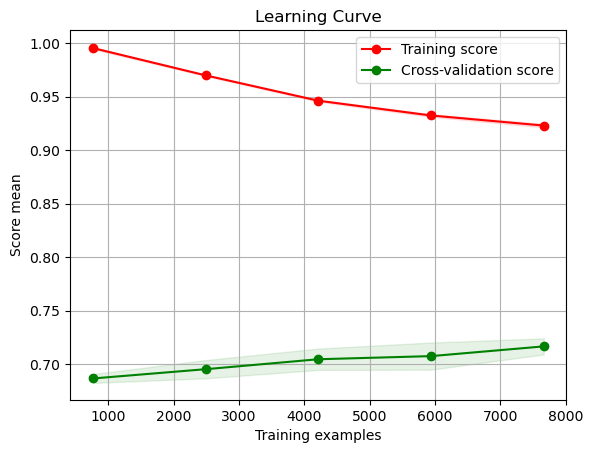

In [34]:
# vanila logistic regression
acc, table = classification(model_lgr_vanila, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.719699342311306
              precision    recall  f1-score   support

       false       0.67      0.00      0.00       896
        true       0.72      1.00      0.84      2297

    accuracy                           0.72      3193
   macro avg       0.69      0.50      0.42      3193
weighted avg       0.70      0.72      0.60      3193



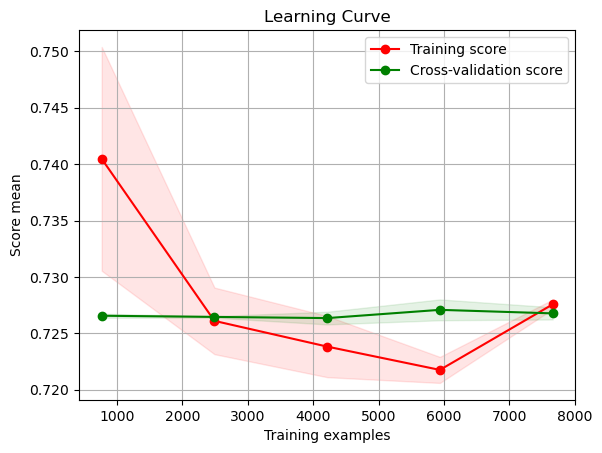

In [35]:
# logistic reguression with l2 regularization and less C
acc, table = classification(model_lgr, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.6984027560288131
              precision    recall  f1-score   support

       false       0.46      0.43      0.44       890
        true       0.78      0.80      0.79      2303

    accuracy                           0.70      3193
   macro avg       0.62      0.62      0.62      3193
weighted avg       0.69      0.70      0.70      3193



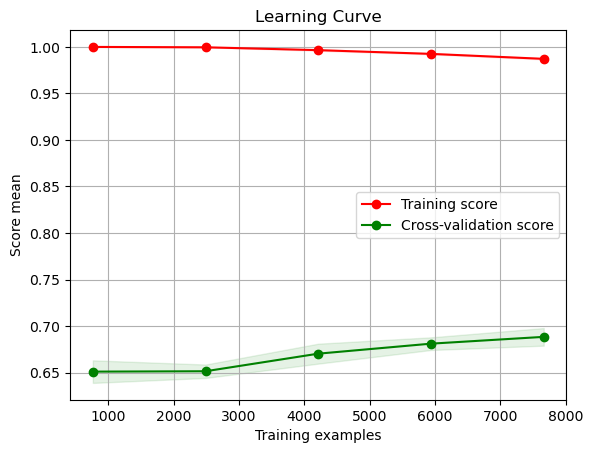

In [36]:
# vanila linear svm
acc, table = classification(model_svm_vanila, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.7247103037895396
              precision    recall  f1-score   support

       false       0.58      0.10      0.17       903
        true       0.73      0.97      0.84      2290

    accuracy                           0.72      3193
   macro avg       0.66      0.53      0.50      3193
weighted avg       0.69      0.72      0.65      3193



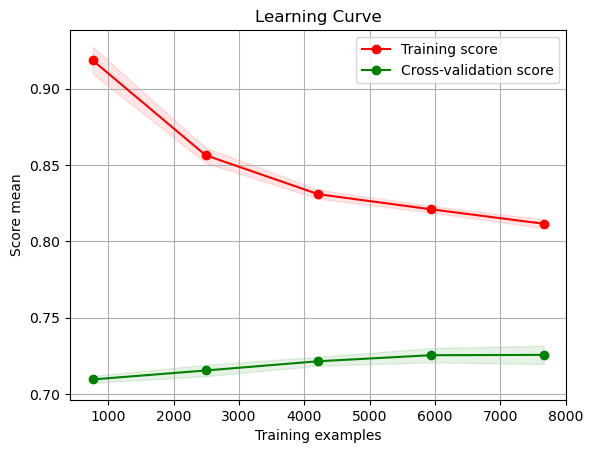

In [37]:
# linear svm with hinge loss
acc, table = classification(model_svm, X, y)
print("accuracy : ",acc)
print(table)

accuracy :  0.7629188850610711
              precision    recall  f1-score   support

       false       0.90      0.17      0.29       893
        true       0.76      0.99      0.86      2300

    accuracy                           0.76      3193
   macro avg       0.83      0.58      0.57      3193
weighted avg       0.79      0.76      0.70      3193



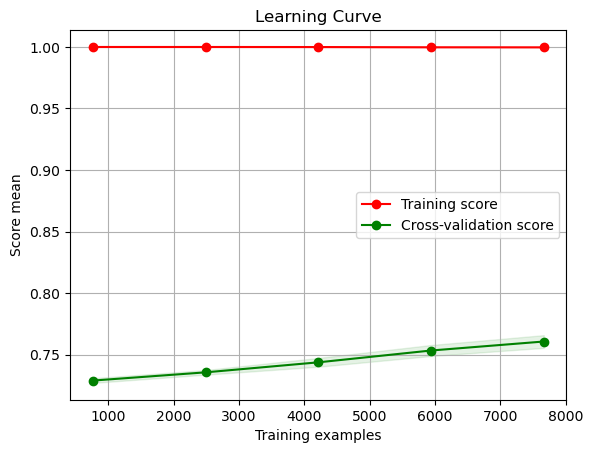

In [38]:
# random forest
acc, table = classification(model_rf, X, y)
print("accuracy : ",acc)
print(table)

Also, we can consdier using an ensemble of models for better one. Ensemble methods such as bagging, boosting, and stacking can help improve the performance of the model by combining the predictions of multiple models. Consider using an ensemble of multiple Random Forest models or combining the Random Forest model with other models such as Logistic Regression, Naive Bayes, or Support Vector Machines.

In [39]:
## 이거 하면 좋을 거 같은데 시간 없으면 빼고

We found Random Forest Classifier has the best training score and Cross-validation score, and accuracy, and the second better model is using vanila linear SVM. So, we concluded to choose final classifier model using Random Forest, and now, use input for looking for probability of truth as Fake News Detection.

# Results

In [ ]:
# Predict

In [ ]:
import pickle
var = input("News: ")

def detect_fake_news(var):    
    fin_mod = pickle.load(open('final_model.sav', 'rb'))  // ???? 
    pred = fin_mod.predict([var])
    prob = fin_mod.predict_proba([var])

    return (print("Entered statement: ",pred[0]), print("Truth probablity: ",prob[0][1]))

if __name__ == '__main__':
    detect_fake_news(var)

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for? 

There are no exisitng public datasets that can provide all possible features of news content, social context, and spatiotemporal information. Existing datatsets have some limitiations that we try to address in our data repository. For exmple, the LIAR dataset that we used contains mostly short statements instead of entire news articles with the meta attributes. 

### Ethics & Privacy

In our dataset, there may be some potential ethical concerns because we are retrieving our data from previously published news articles. Because we are basically evaluating whether a person’s article is true or false, in some way, we are criticizing the person’s work. Therefore, by providing data that a person’s work is wrong, it may harm the person’s career. We also think that this may also bring up privacy issues because we are using someone else’s work and evaluating it without the publisher’s permission. However, we believe that this will not be that much of a problem because news itself will always be biased in some sort of way and it is the reader’s responsibility to take in only correct information. Therefore, we believe that our project serves a good purpose because it helps the reader’s to make correct decisions in trusting the correct news article. 

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.